In [1]:
import numpy as np  # linear alg
import pandas as pd  # data processing 
import os
from glob import glob  # file searching
%matplotlib inline
import matplotlib.pyplot as plt  # plotting

In [2]:
# Setting up access to the images and csv

PATH = os.path.abspath('./data')
SOURCE_IMAGES = os.path.join(PATH, "images")
images = glob(os.path.join(SOURCE_IMAGES, "*.png"))
xray_labels_df = pd.read_csv(os.path.join(PATH, 'sample_labels.csv'))

In [3]:
all_image_paths = {os.path.basename(x): x for x in images}

# Add the path to all images to the dataframe
xray_labels_df['path'] = xray_labels_df['Image Index'].map(all_image_paths.get)

# Fix Patient Age to be just a number
xray_labels_df['Patient Age'] = xray_labels_df['Patient Age'].map(lambda x: int(x[:-1]))
xray_labels_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,path
400,00002066_014.png,Nodule,14,2066,80,M,PA,2992,2991,0.143,0.143,/Users/dennisi1/Code/school/csc665/term_projec...
1849,00009736_008.png,Effusion|Emphysema,8,9736,66,F,AP,2500,2048,0.168,0.168,/Users/dennisi1/Code/school/csc665/term_projec...
2665,00013440_001.png,No Finding,1,13440,17,M,PA,2992,2991,0.143,0.143,/Users/dennisi1/Code/school/csc665/term_projec...


Preprocessing:
-------------

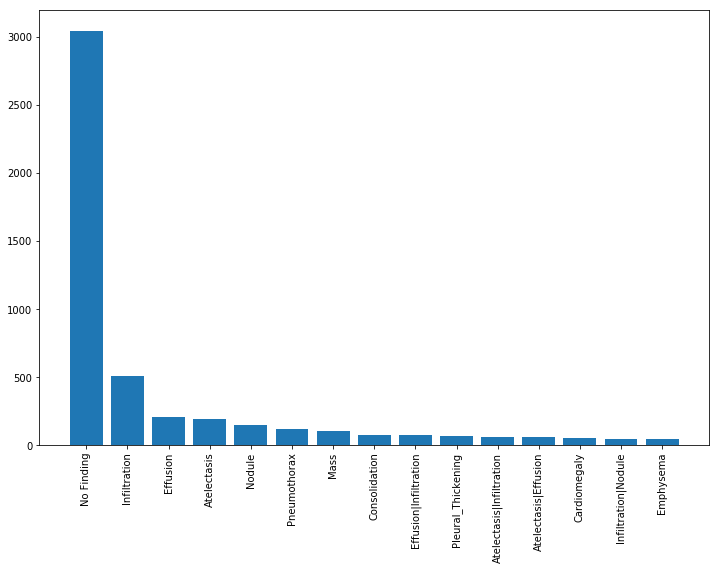

In [14]:
# Get the number of each type of disease classification
label_counts = xray_labels_df['Finding Labels'].value_counts()[:15]

# plot it
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
# Rotate and space out the labels to make them readable
ax1.bar(np.arange(len(label_counts)) + 1.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts)) + 1.5)
_ = ax1.set_xticklabels(label_counts.index, rotation=90)